In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Exploring data
df=pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
# Finding Null Values
Null=df.isnull()
Null.sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# Dropping A Column
df.drop('Serial No.',axis='columns',inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


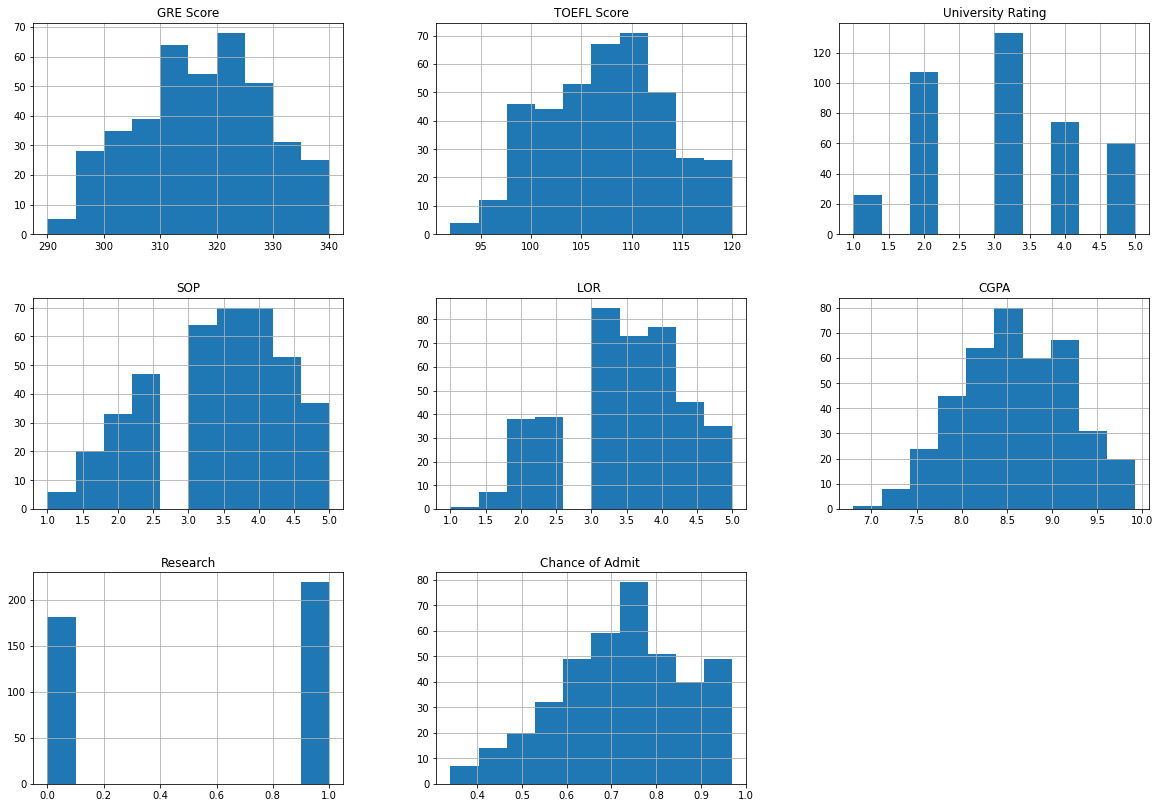

In [7]:
# Producing a Histogram
df.hist(figsize=(20,14))
plt.show()

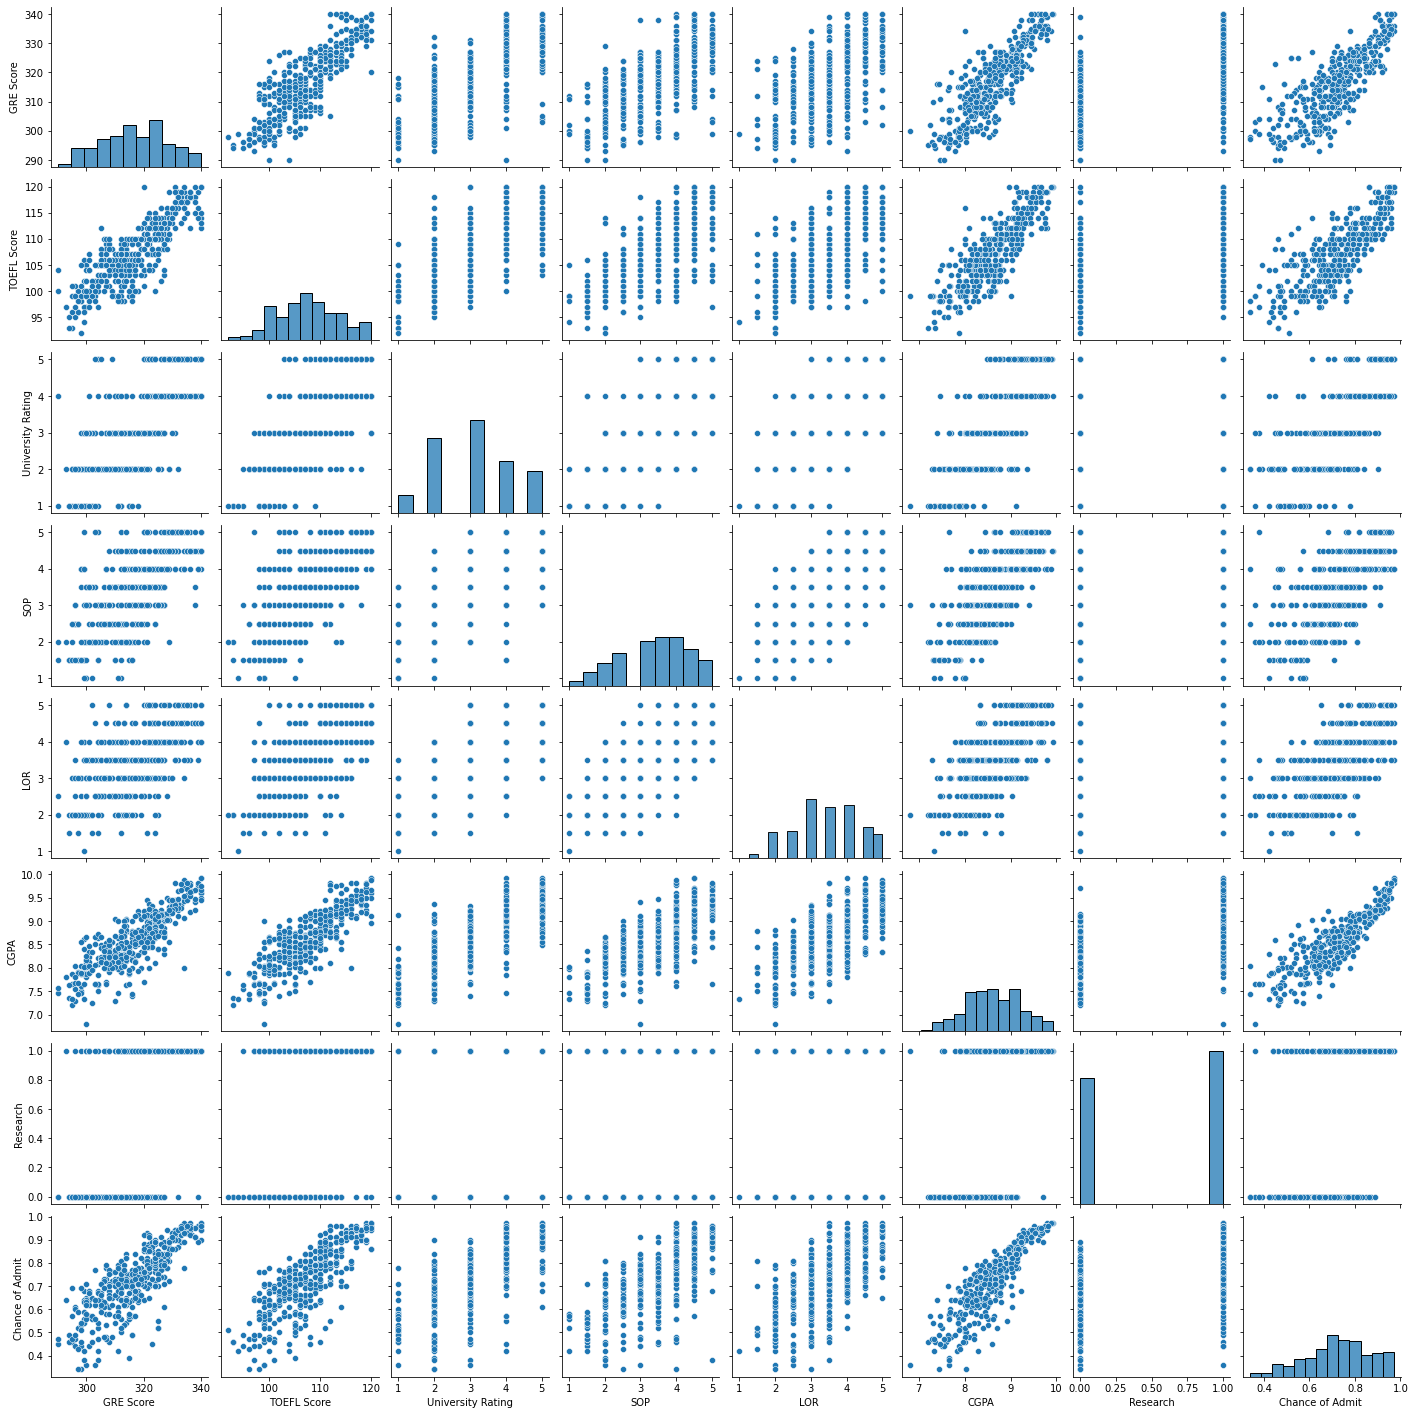

In [8]:
# Displaying a Pairplot
sns.pairplot(data=df)

In [9]:
#Finding Histogram of Individual Attributes
gre_score=df[['GRE Score']]
toefl_score=df[['TOEFL Score']]
uni_rating=df[['University Rating']]

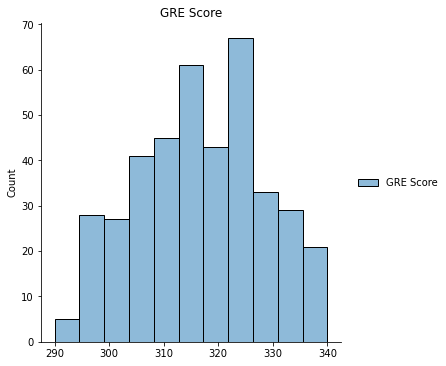

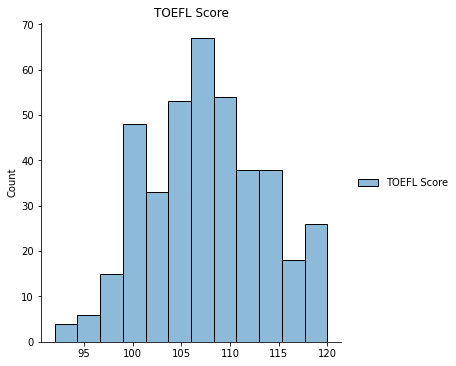

In [10]:
fig=sns.displot(gre_score,color='red',kde=False)
plt.title('GRE Score')
plt.show()

fig=sns.displot(toefl_score,color='blue')
plt.title('TOEFL Score')
plt.show()

In [11]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

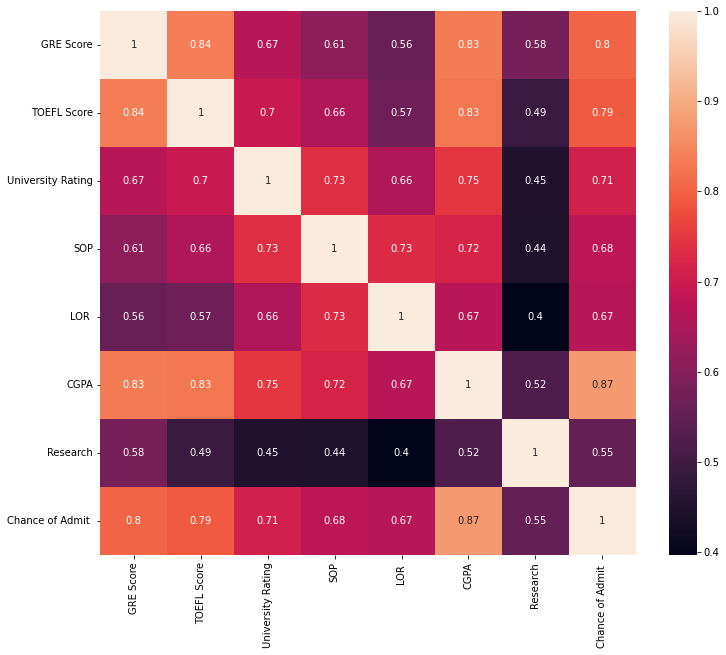

In [12]:
# Producing Heatmaps
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

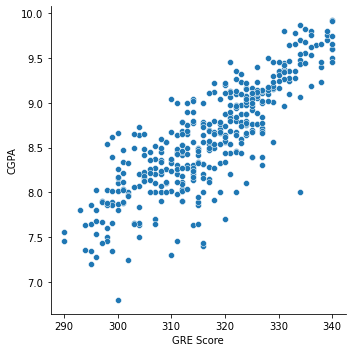

In [13]:
# Comparing with Relplot
sns.relplot(x='GRE Score',y='CGPA',data=df)

In [14]:
#Renaming a Column
df=df.rename(columns={'Chance of Admit ': 'Admit Possibilty'})
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


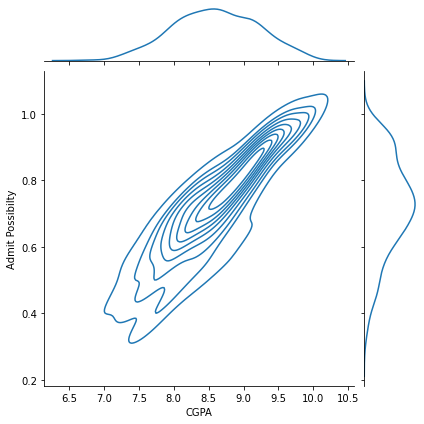

In [15]:
# Using Jointplot
fig=sns.jointplot(x='CGPA',y='Admit Possibilty',data=df,kind='kde')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [28]:
x_data=df.drop('Admit Possibilty',axis='columns')
y_data=df['Admit Possibilty']
x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.3)

In [18]:
x_train.shape, y_train.shape

((280, 7), (280,))

In [19]:
linearModel=LinearRegression()
linearModel=linearModel.fit(x_train,y_train)

In [20]:
# Predicting CV Score
def cv_scores(model):
    scores=cross_val_score(model,x_train,y_train,cv=5,scoring='r2')
    print('CV Mean:',np.mean(scores))
    print('STD:',np.std(scores))

In [21]:
cv_scores(linearModel)

CV Mean: 0.808858658048662
STD: 0.028560395810683186


In [22]:
model= LinearRegression()
model.fit(x_test,y_test)
model.score(x_test,y_test)

0.7861456955626436

CV Score says whether the model is an underfit or an overfit. Values between 0 and 1 are good.

# Model Predictions

In [23]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
predict_value=[[int(input("GRE Score")),
                int(input("TOEFL Score")),
                float(input("University Rating")),
                float(input("SOP")),
                float(input("LOR")),
                float(input("CGPA")),
                int(input("Research ( 1 For True, 0 For False)")),
]]
print('The Chance of you getting admission in the US is {}%'.format(round(model.predict(predict_value)[0]*100)))

ValueError: invalid literal for int() with base 10: ''